# Lab 4 Part 1: Linear Regression
Jonathan Ting

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from warnings import filterwarnings

# Ignore matplotlib legend warnings.
filterwarnings('ignore')

# Read in the auto-mpg.csv dataset. 
df = pd.read_csv('auto-mpg.csv')

# Create the y label vector using the MPG column.
y = df['mpg']
# The features we will be using for regression:
# Include: Cylinders, Displacement, Horsepower, Weight, Acceleration
# Ignore: Model-year, Origin, Car-name columns
features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']

## Question 1.1

Cylinders
Training MSE: 24.66, Training R2: 0.61
Testing MSE: 21.81, Testing R2: 0.57
Coefficient: -3.65, Intercept: 43.62


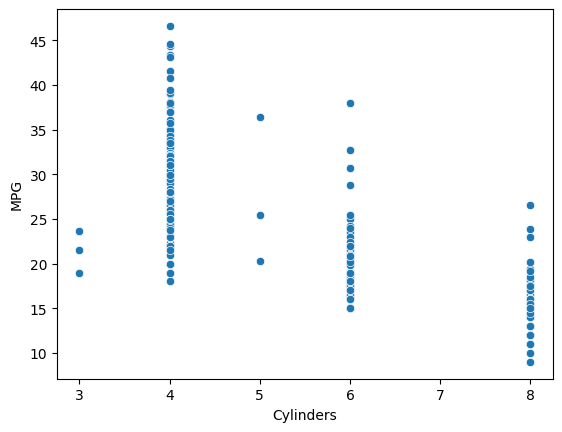

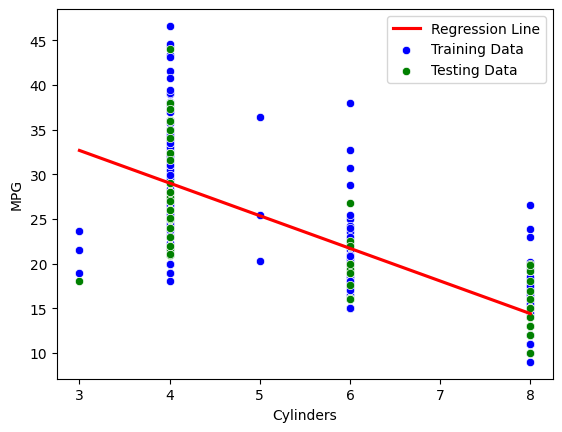

Displacement
Training MSE: 21.54, Training R2: 0.66
Testing MSE: 21.23, Testing R2: 0.58
Coefficient: -0.06, Intercept: 35.77


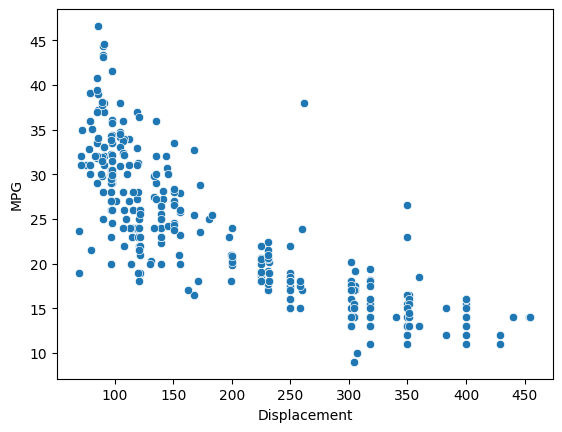

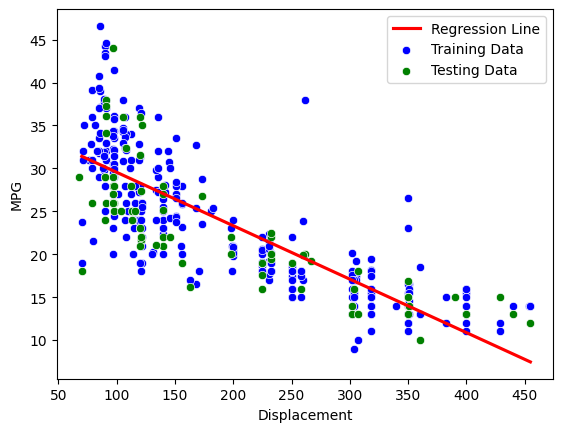

Horsepower
Training MSE: 24.48, Training R2: 0.61
Testing MSE: 22.15, Testing R2: 0.57
Coefficient: -0.16, Intercept: 40.61


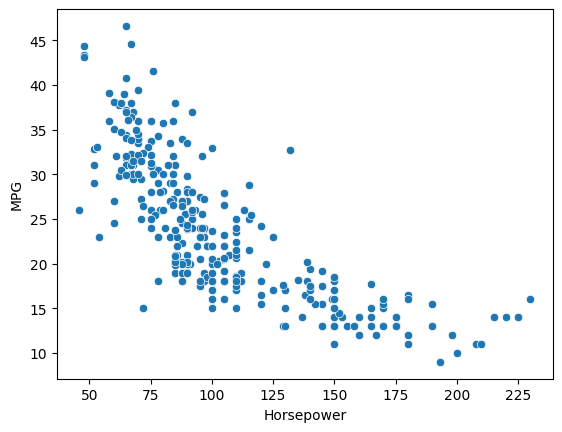

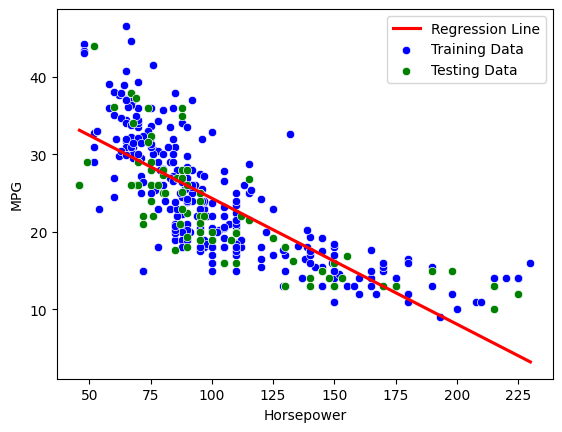

Weight
Training MSE: 19.05, Training R2: 0.70
Testing MSE: 17.69, Testing R2: 0.65
Coefficient: -0.01, Intercept: 47.20


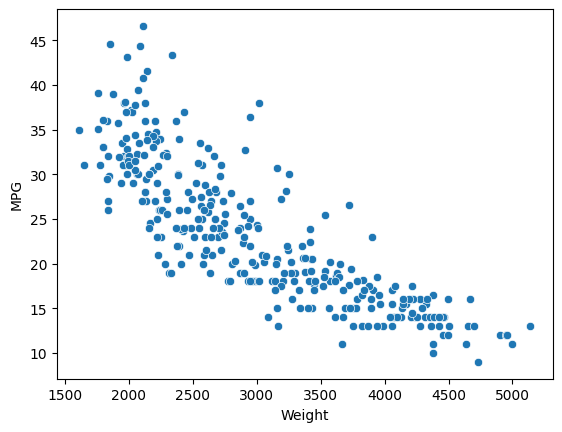

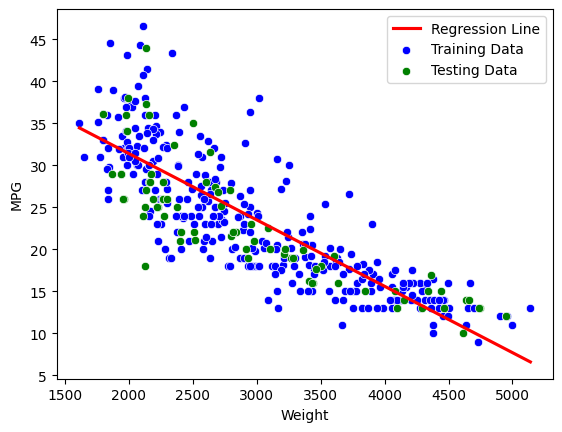

Acceleration
Training MSE: 52.39, Training R2: 0.17
Testing MSE: 40.07, Testing R2: 0.21
Coefficient: 1.16, Intercept: 5.52


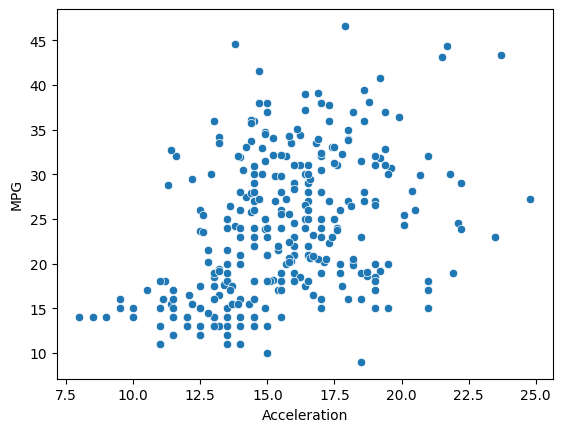

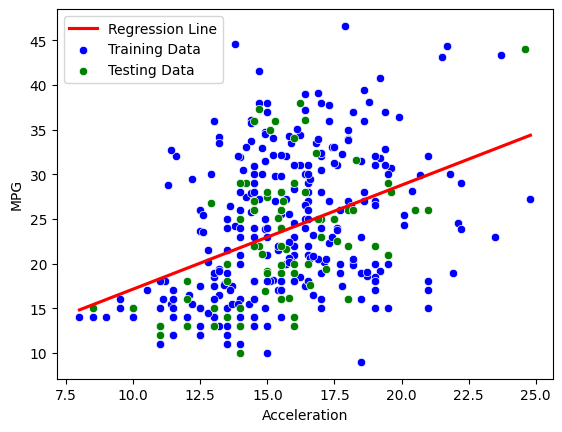

In [56]:
# Run linear regression on each of the five features.
for feature in features:
    # Create an X matrix where the row is the current feature of interest.
    X = df[feature].values.reshape(-1, 1)
    # Create a training and testing set where the testing set is 20% of the data.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Use linear regression to fit to the training data.
    reg = LinearRegression().fit(X_train, y_train)
    # Create a prediction vector based on the training data.
    train_pred = reg.predict(X_train)

    # Print the mean-squared error and the R2 score of the training set.
    print(f'{feature.capitalize()}')
    print(f'Training MSE: {mean_squared_error(y_train, train_pred):.2f}, Training R2: {reg.score(X_train, y_train):.2f}')
    
    # Create a prediction vector based on the testing data.
    test_pred = reg.predict(X_test)
    # Print the mean-squared error and the R2 score of the testing set.
    print(f'Testing MSE: {mean_squared_error(y_test, test_pred):.2f}, Testing R2: {reg.score(X_test, y_test):.2f}')
    # Print the coefficient and intercept parameters for the feature.
    print(f'Coefficient: {reg.coef_[0]:.2f}, Intercept: {reg.intercept_:.2f}')

    # Create a plot that shows the training data.
    sns.scatterplot(x=X_train.flatten(), y=y_train)
    plt.xlabel(feature.capitalize())
    plt.ylabel('MPG')
    plt.show()

    # Plot the linear regression line along with points for the training data and the testing data.
    sns.regplot(x=X_train, y=train_pred, color='red', scatter=False)
    sns.scatterplot(x=X_train.flatten(), y=y_train, color='blue')
    sns.scatterplot(x=X_test.flatten(), y=y_test, color='green')
    plt.xlabel(feature.capitalize())
    plt.ylabel('MPG')
    plt.legend(['Regression Line', '_', 'Training Data', 'Testing Data'])
    plt.show()

## Question 1.2

In [57]:
# Create an X matrix that includes all five features.
X = df[features]
# Create a training and testing set where the testing set is 20% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use linear regression to fit to the training data.
reg = LinearRegression().fit(X_train, y_train)
# Create a prediction vector based on the training data.
train_pred = reg.predict(X_train)

# Print the mean-squared error and the R2 score of the training set.
print(f'All Features')
print(f'Training MSE: {mean_squared_error(y_train, train_pred):.2f}, Training R2: {reg.score(X_train, y_train):.2f}')
# Create a prediction vector based on the testing data.
test_pred = reg.predict(X_test)
# Print the mean-squared error and the R2 score of the testing set.
print(f'Testing MSE: {mean_squared_error(y_test, test_pred):.2f}, Testing R2: {reg.score(X_test, y_test):.2f}')

All Features
Training MSE: 17.88, Training R2: 0.72
Testing MSE: 17.94, Testing R2: 0.65
